# Life Expectancy and GDP

## 1. Project Goal

I will try to unearth any meaningful relationships between the GDP and life expectancy of six countries (Chile, China, Germany, Mexico, United States of America, Zimbabwe) based on the data that was obtained from WHO (World Health Organization)

In [79]:
#import modules 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Dataset
I will be exploring the dataset to discover any clues that can lead to interesting anlysis

In [80]:
#import the dataset into a dateframe
life_gdp = pd.read_csv('all_data.csv')

#display the dataset
life_gdp

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [81]:
#get a concise summary of the dataset
life_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [82]:
#generate descriptive statistics 
life_gdp.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Let's look into each column a little deeper

### a. Country

In [83]:
#find unique values of the column: Country
countries = life_gdp['Country'].unique()
print('There are six countries: {}'.format(countries))

There are six countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### b. Year

In [84]:
#find unique values of the columns: Year
year = life_gdp['Year'].unique()
print('The dataset ranges from {} to {}'.format(year[0],year[-1]))

The dataset ranges from 2000 to 2015


## c. Life expectancy at birth (years)

In [85]:
#display the life expectancy column
life_gdp.['Life expectancy at brith (years)']
print('It is pretty hard to type the column name correctly. I will rename it')

SyntaxError: invalid syntax (<ipython-input-85-360f6a893d9d>, line 2)

In [86]:
#rename the column for life expectancy
life_gdp.rename(columns = {"Life expectancy at birth (years)" : 'Life_expectancy'},inplace = True)

In [87]:
#disply the column again
life_gdp['Life_expectancy']

0     77.3
1     77.3
2     77.8
3     77.9
4     78.0
      ... 
91    54.9
92    56.6
93    58.0
94    59.2
95    60.7
Name: Life_expectancy, Length: 96, dtype: float64

### d. GDP

In [88]:
#disply GDP
life_gdp['GDP']

0     7.786093e+10
1     7.097992e+10
2     6.973681e+10
3     7.564346e+10
4     9.921039e+10
          ...     
91    1.209845e+10
92    1.424249e+10
93    1.545177e+10
94    1.589105e+10
95    1.630467e+10
Name: GDP, Length: 96, dtype: float64

I would like to change scientific numbers to integers.

In [89]:
#cast a panda object to integer 
life_gdp['GDP'] = life_gdp['GDP'].astype(int)

In [90]:
life_gdp['GDP']

0     77860932152
1     70979923960
2     69736811435
3     75643459840
4     99210392858
         ...     
91    12098450749
92    14242490252
93    15451768659
94    15891049236
95    16304667807
Name: GDP, Length: 96, dtype: int64

# 3. Exploratory Analysis 

## a. Line charts of Chile to see if there's any relationships between the life expectancy and GDP

In [91]:
#Select the row where the country is Chile
chile = life_gdp[life_gdp['Country'] == 'Chile']

In [92]:
#print chile
chile

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,77860932152
1,Chile,2001,77.3,70979923960
2,Chile,2002,77.8,69736811435
3,Chile,2003,77.9,75643459840
4,Chile,2004,78.0,99210392858
5,Chile,2005,78.4,122965000000
6,Chile,2006,78.9,154788000000
7,Chile,2007,78.9,173606000000
8,Chile,2008,79.6,179638000000
9,Chile,2009,79.3,172389000000


Text(0.5, 0, 'Year')

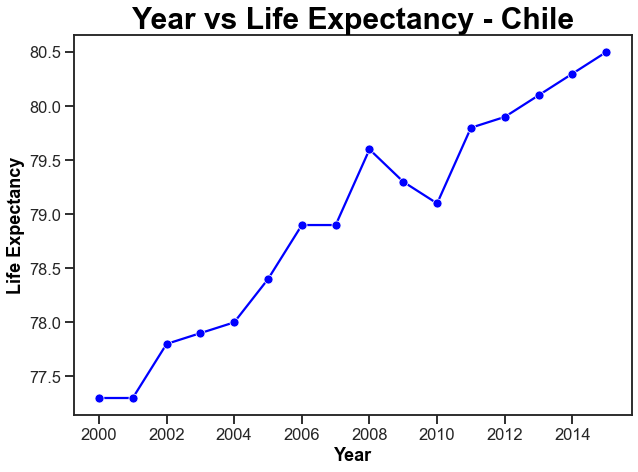

In [93]:
#plot Year against Life Expectancy for Chile
f,ax = plt.subplots(figsize = (10,7))
sns.lineplot(x = 'Year',y = 'Life_expectancy',data=chile,color='blue',marker='o')
sns.set_context('talk')
ax.set_ylabel('Life Expectancy',fontweight='semibold',color='black')
ax.set_title('Year vs Life Expectancy - Chile',fontsize=30,fontweight='semibold',color='black')
ax.set_xlabel('Year',fontweight='semibold',color='black')



Text(0.5, 0, 'Year')

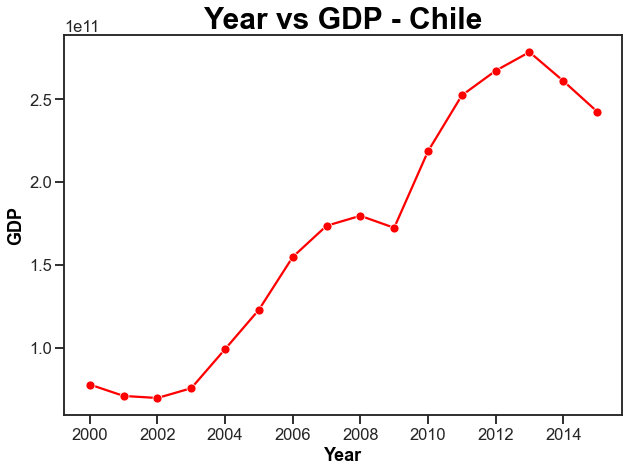

In [94]:
#plot Year against GDP for Chile
f,ax = plt.subplots(figsize = (10,7))
sns.lineplot(x= 'Year',y='GDP',data=chile,color='red',marker='o')
sns.set_context('talk')
ax.set_ylabel('GDP',fontweight='semibold',color='black')
ax.set_title('Year vs GDP - Chile',fontsize=30,fontweight='semibold',color='black')
ax.set_xlabel('Year',fontweight='semibold',color='black')


#### I would like to carete a combo chart that displays the two line graphs on the same x-axis. Then , we will see if there's any patterns.

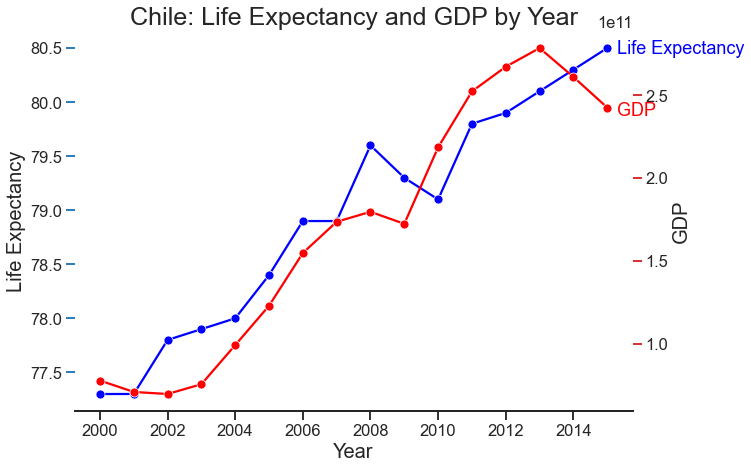

In [95]:
#create combo chart
fig,ax1 = plt.subplots(figsize = (10,7))
color = 'tab:blue'
#create the first line graph
sns.set_style('ticks')
sns.set_context('talk')
ax1.set_title('Chile: Life Expectancy and GDP by Year',fontsize =25)
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Life Expectancy',fontsize=20)
ax1 = sns.lineplot(x='Year',y='Life_expectancy',data = chile,color = 'blue',marker = 'o')
ax1.tick_params(axis='y',color=color)
plt.text(2015.3,80.45,'Life Expectancy',color='blue')
plt.text(2015.3,79.88,'GDP',color = 'red')
#specify we want to share the x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#create the second line graph
ax2.set_ylabel('GDP',fontsize=20)
ax2 = sns.lineplot(x='Year',y='GDP',data=chile,color='red',marker = 'o')
ax2.tick_params(axis='y', color=color)

sns.despine(right=True,left = True)



<b>Conclusion: <br>
The combo graph indicates that these two line graphs increase at a similiar rate. As GDP increases life expectancy increase as well.

As can be seen in the above graph, there is a positive correlation between GDP and life expectancy. Thus, I would like to plot GDP against life expectancy and draw a linear equation. At the same time, $r^2$ and p-value will be computed to see how these two variables are linearly related.

Text(73000000000, 80.5, 'P value = 1.8659139746585596e-08 \nR squared = 0.9022656804696328')

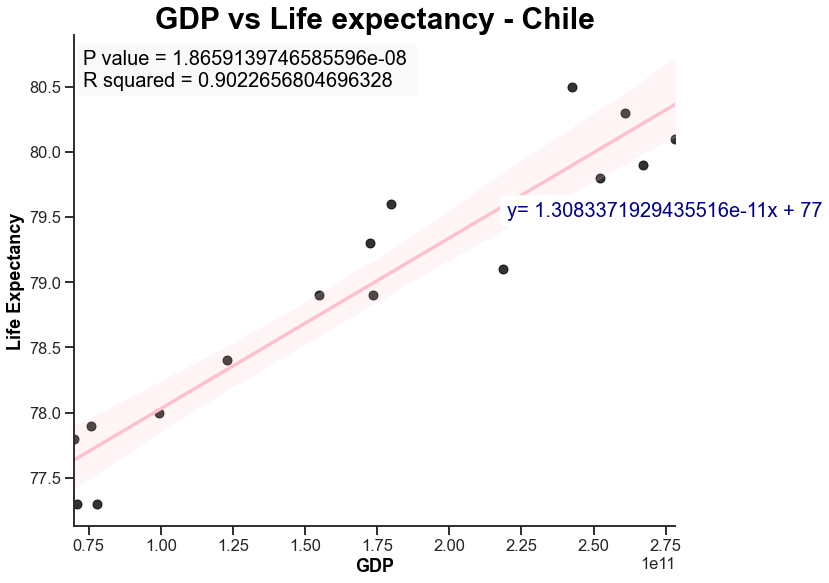

In [96]:
#linear regression equation between sex and charges
slope, intercept, r_value,p_value,std_err = stats.linregress(chile.GDP,chile.Life_expectancy)


line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value} 
R squared = {r_value**2}"""

#textbox properties
box1 = dict(boxstyle='round', facecolor='white', alpha=1)
box2 = dict(boxstyle='round', facecolor='whitesmoke', alpha=.5)


graph = sns.lmplot(data=chile,x='GDP',y='Life_expectancy',height = 8,aspect = 1.2,scatter_kws = {'color':'black'},line_kws = {'color':'pink'})
plt.ylabel('Life Expectancy',fontweight='semibold',color='black')
plt.title('GDP vs Life expectancy - Chile',fontsize=30,fontweight='semibold',color='black')
plt.xlabel('GDP',fontweight='semibold',color='black')
plt.text(220000000000,79.5,line_equation,fontsize=20,color='darkblue',bbox=box1)
plt.text(73000000000,80.5,r_p_value,fontsize=20,color='black',bbox=box2)

Conclusion: <br>
As expected, GDP and life expectancy are linearly related. $r^2$ is 90.2%, indicating that 90.2% of the variation in life expectancy may be explained by GDP. if GDP increases by 1.0e+11 then, life expectancy will increase by around 1.3 years on average. Do we to work harder to live longer!!??? 

## b. Scatter plot of GDP against life expectancy on average of the six countries

In [97]:
#find average life expectancy and GDP by country
life_GDP_by_country = life_gdp.groupby('Country',as_index = False).agg({'GDP':"mean",'Life_expectancy': "mean"})

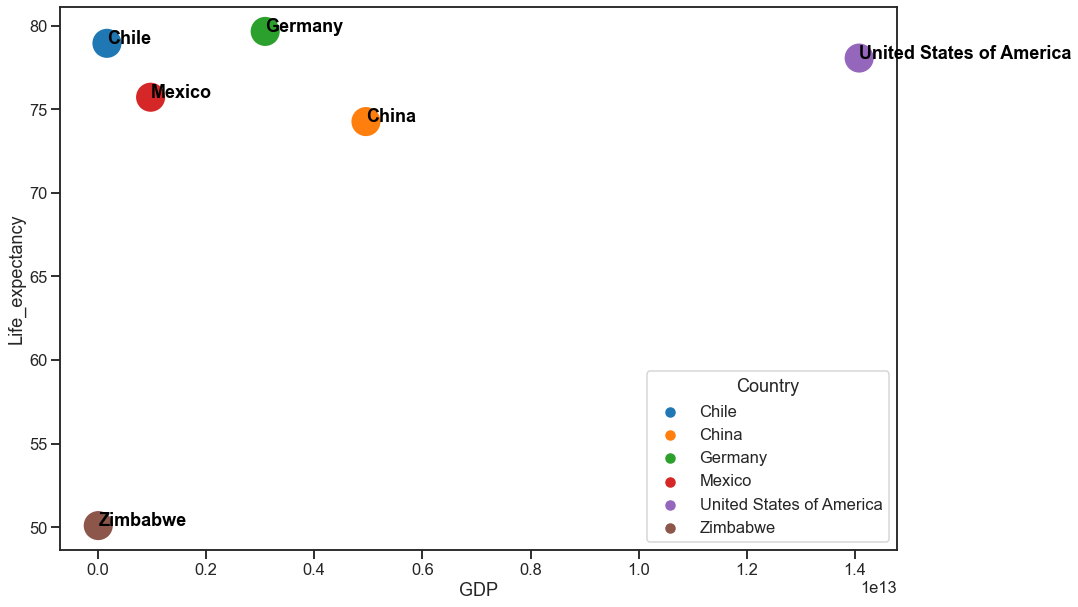

In [98]:
#plot GDP against life_expectancy
#linear regression equation between sex and charges
slope, intercept, r_value,p_value,std_err = stats.linregress(chile.GDP,chile.Life_expectancy)


line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value} 
R squared = {r_value**2}"""

#textbox properties
box1 = dict(boxstyle='round', facecolor='white', alpha=1)
box2 = dict(boxstyle='round', facecolor='whitesmoke', alpha=.5)

ax,fig = plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = life_GDP_by_country, x='GDP', y='Life_expectancy',hue='Country',s=1000)
for line in range(0,life_GDP_by_country.shape[0]):
    pl.text(life_GDP_by_country.GDP[line]+0.2,life_GDP_by_country.Life_expectancy[line],life_GDP_by_country.Country[line],horizontalalignment='left',size='medium',color='black',weight='semibold')

    

A strong linear relationship is not super clear on the above scatter plot. GDP, Gross Domestic product, might not be a good variable to use since it is calculated as the sum of each individual's income or production whereas life expectancy is calcualted as the average of each individual's life expectancy. Thus, I would like to use GDP per capita instead of GDP. 

In [99]:
#create a column: population
life_GDP_by_country['population'] = [18730000,1393000000,83020000,126000000,328200000,14000000]

In [100]:
#craete a column: GDP per capita
life_GDP_by_country['GDP_per_capita'] = life_GDP_by_country['GDP']/life_GDP_by_country['population'] 

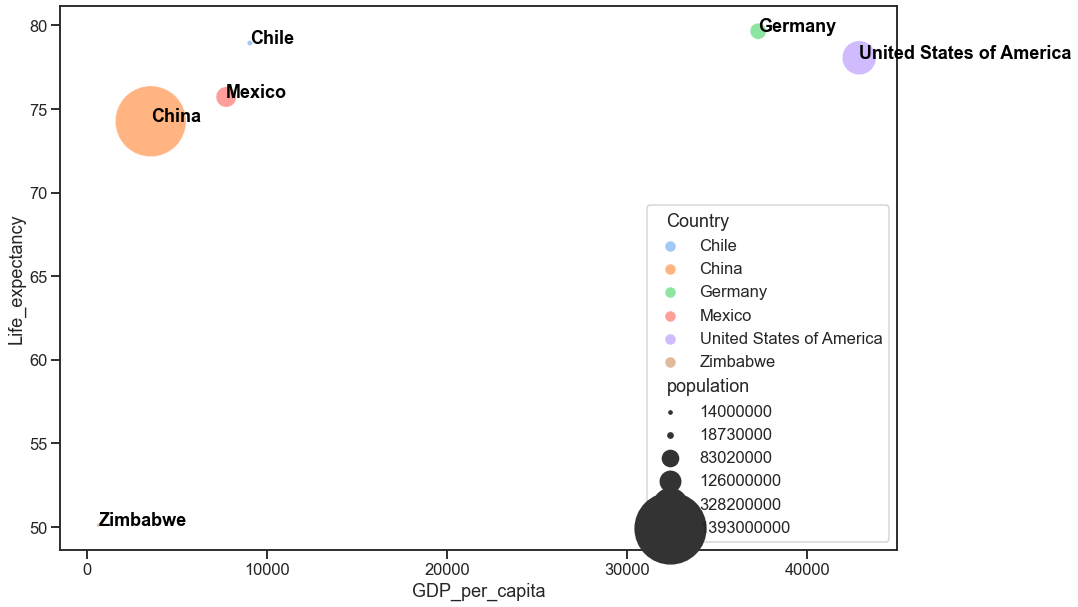

In [101]:
#plot GDP against life_expectancy
ax,fig = plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = life_GDP_by_country, x='GDP_per_capita', y='Life_expectancy',hue='Country', size = 'population',sizes = (10,5000),palette = 'pastel')
for line in range(0,life_GDP_by_country.shape[0]):
    pl.text(life_GDP_by_country.GDP_per_capita[line]+0.2,life_GDP_by_country.Life_expectancy[line],life_GDP_by_country.Country[line],horizontalalignment='left',size='medium',color='black',weight='semibold')
    

Visually, the linear association looks a little bit better with GDP per capita. However, it's not super satisfying. I feel like Zimbabwe is an outlier. I would like to remove Zimbabwe and replot it!

In [102]:
life_GDP_by_country2 = life_GDP_by_country[life_GDP_by_country['Country'].isin(['Zimbabwe']) == False ]

In [103]:
life_GDP_by_country2

,Country,GDP,Life_expectancy,population,GDP_per_capita
0,Chile,1.697888e+11,78.94375,18730000,9065.074480
1,China,4.957714e+12,74.26250,1393000000,3559.019203
2,Germany,3.094776e+12,79.65625,83020000,37277.470790
3,Mexico,9.766506e+11,75.71875,126000000,7751.195437
4,United States of America,1.407500e+13,78.06250,328200000,42885.435710


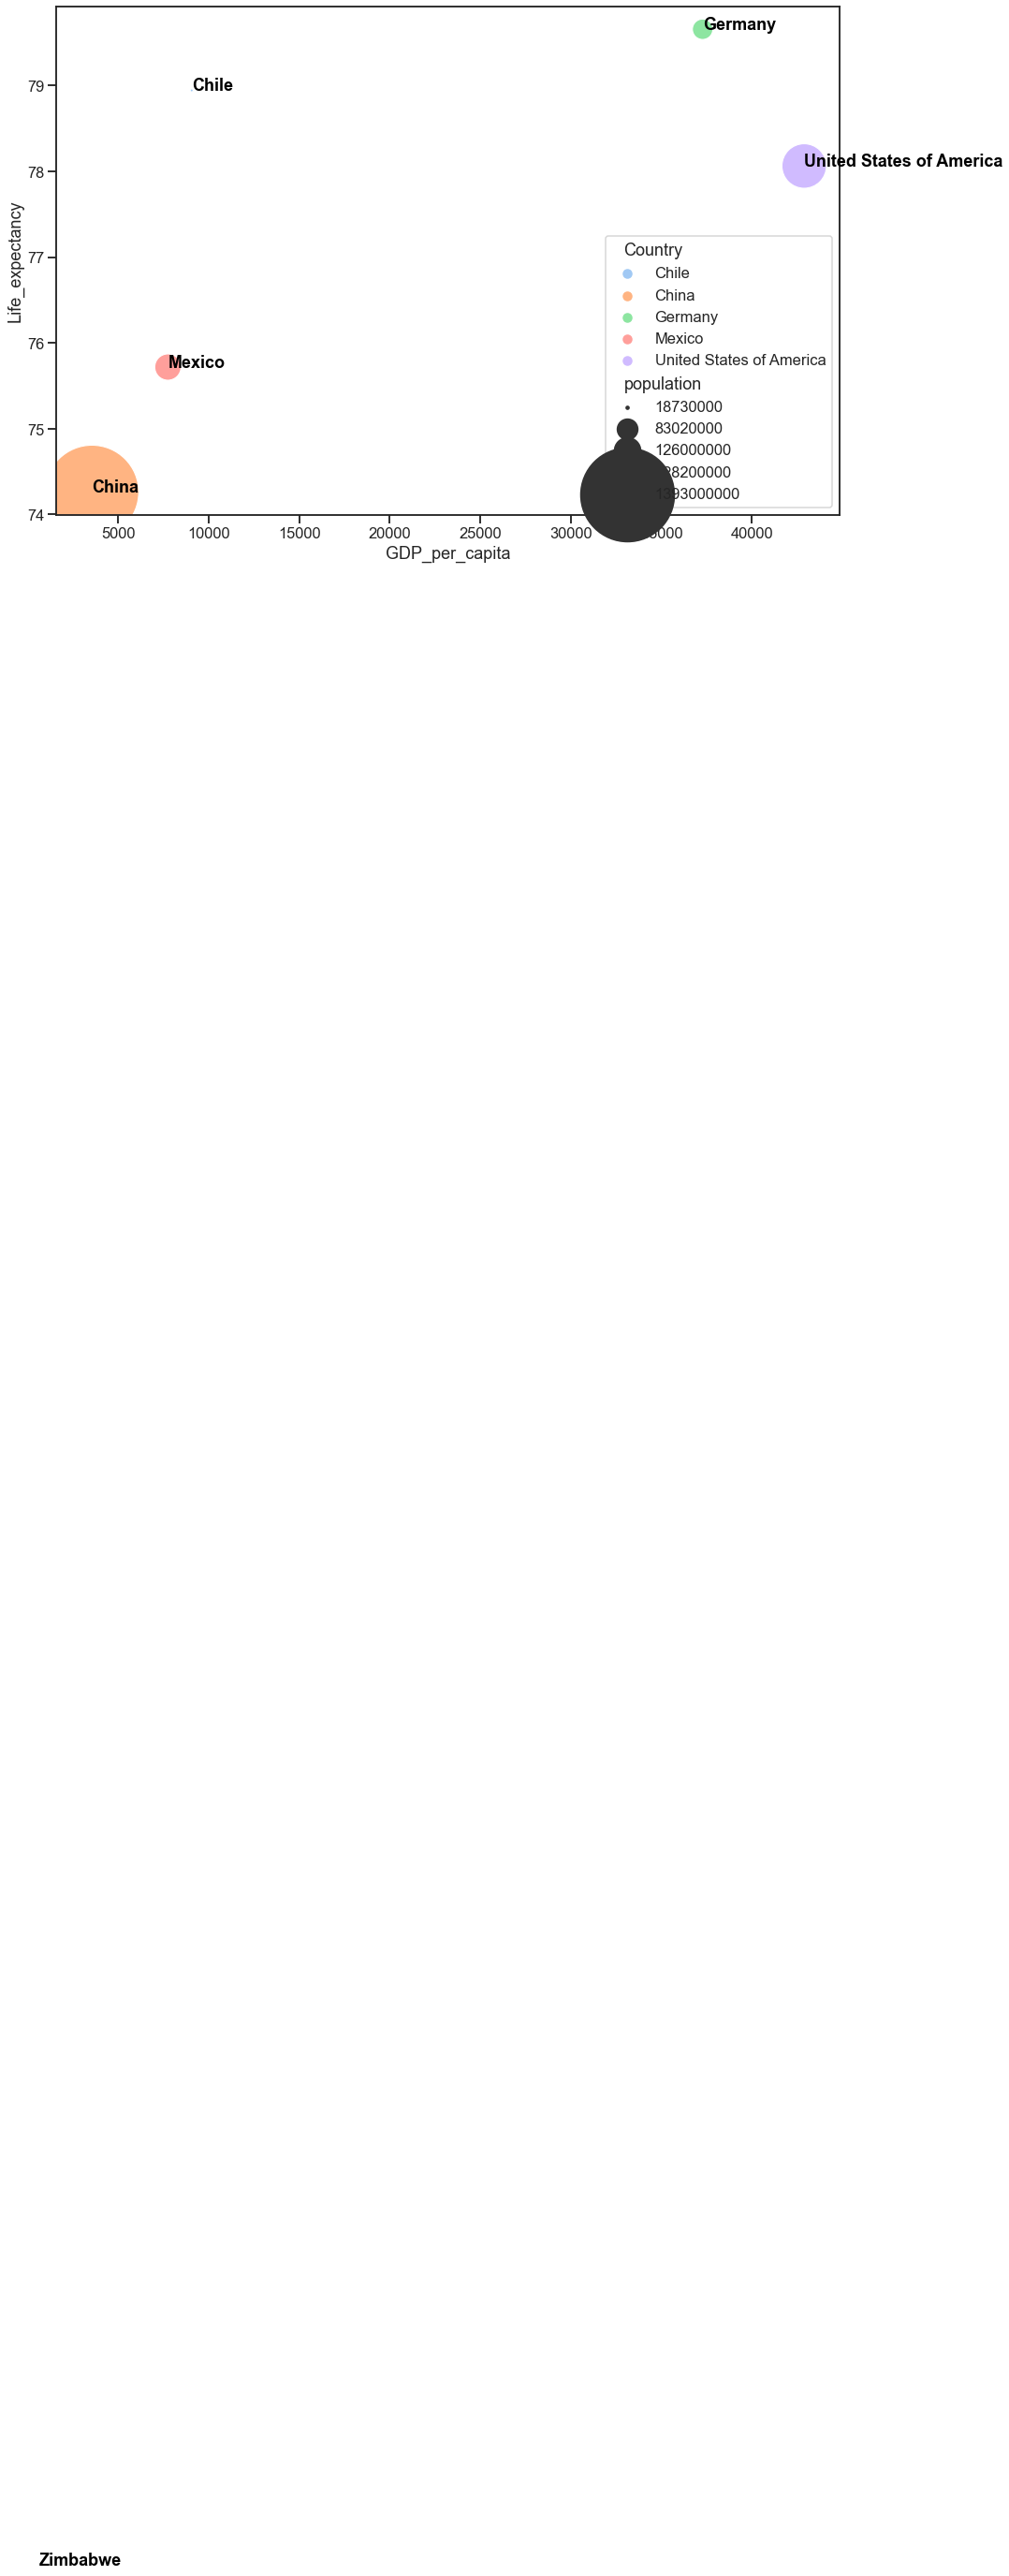

In [104]:
#plot GDP against life_expectancy
ax,fig = plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = life_GDP_by_country2, x='GDP_per_capita', y='Life_expectancy',hue='Country', size = 'population',sizes = (10,10000),palette = 'pastel')
for line in range(0,life_GDP_by_country.shape[0]):
    pl.text(life_GDP_by_country.GDP_per_capita[line]+0.2,life_GDP_by_country.Life_expectancy[line],life_GDP_by_country.Country[line],horizontalalignment='left',size='medium',color='black',weight='semibold')
    

Now, a strong relationship is more apparent! 